In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"upadhyayroshan","key":"0549699db6f2d465b7b5794ac37a2262"}'}

In [6]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d mohammadasimbluemoon/diabeticretinopathyddraptos2019messidorbalanced

100% 3.73G/3.73G [00:34<00:00, 133MB/s]
100% 3.73G/3.73G [00:34<00:00, 117MB/s]


In [8]:
from zipfile import ZipFile
file_name = 'diabeticretinopathyddraptos2019messidorbalanced.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [9]:
train = '/content/CustomDRDataset/train'

In [1]:
import os
import glob as gb
import matplotlib.pyplot as plt
import pandas as pd

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from sklearn.metrics import confusion_matrix

from keras.applications import InceptionResNetV2

In [20]:
for folder in os.listdir(train):
  files = gb.glob(pathname = str(train + '/' + folder + '/*.png'))
  print(f'For data, found {len(files)} in folder {folder}')

For data, found 2485 in folder 3
For data, found 2621 in folder 0
For data, found 2498 in folder 2
For data, found 2452 in folder 1
For data, found 2649 in folder 4


In [21]:
size = []
for folder in  os.listdir(train) : 
    files = gb.glob(pathname= str( train + '/' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0        (512, 512, 3)
1        (512, 512, 3)
2        (512, 512, 3)
3        (512, 512, 3)
4        (512, 512, 3)
             ...      
12700    (512, 512, 3)
12701    (512, 512, 3)
12702    (512, 512, 3)
12703    (512, 512, 3)
12704    (512, 512, 3)
Length: 12705, dtype: object>

In [22]:
code = [0,1,2,3,4]
code = {'0':0, '1':1, '2':2, '3':3, '4':4}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [25]:
s = 100
X_Images = []
y_Types = []
for folder in  os.listdir(train) : 
    files = gb.glob(pathname= str( train + '/' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Images.append(list(image_array))
        y_Types.append(code[folder])

In [26]:
print(f'we have {len(X_Images)} items in X_Images')
print(f'we have {len(y_Types)} items in Y_Types')

we have 12705 items in X_Images
we have 12705 items in Y_Types


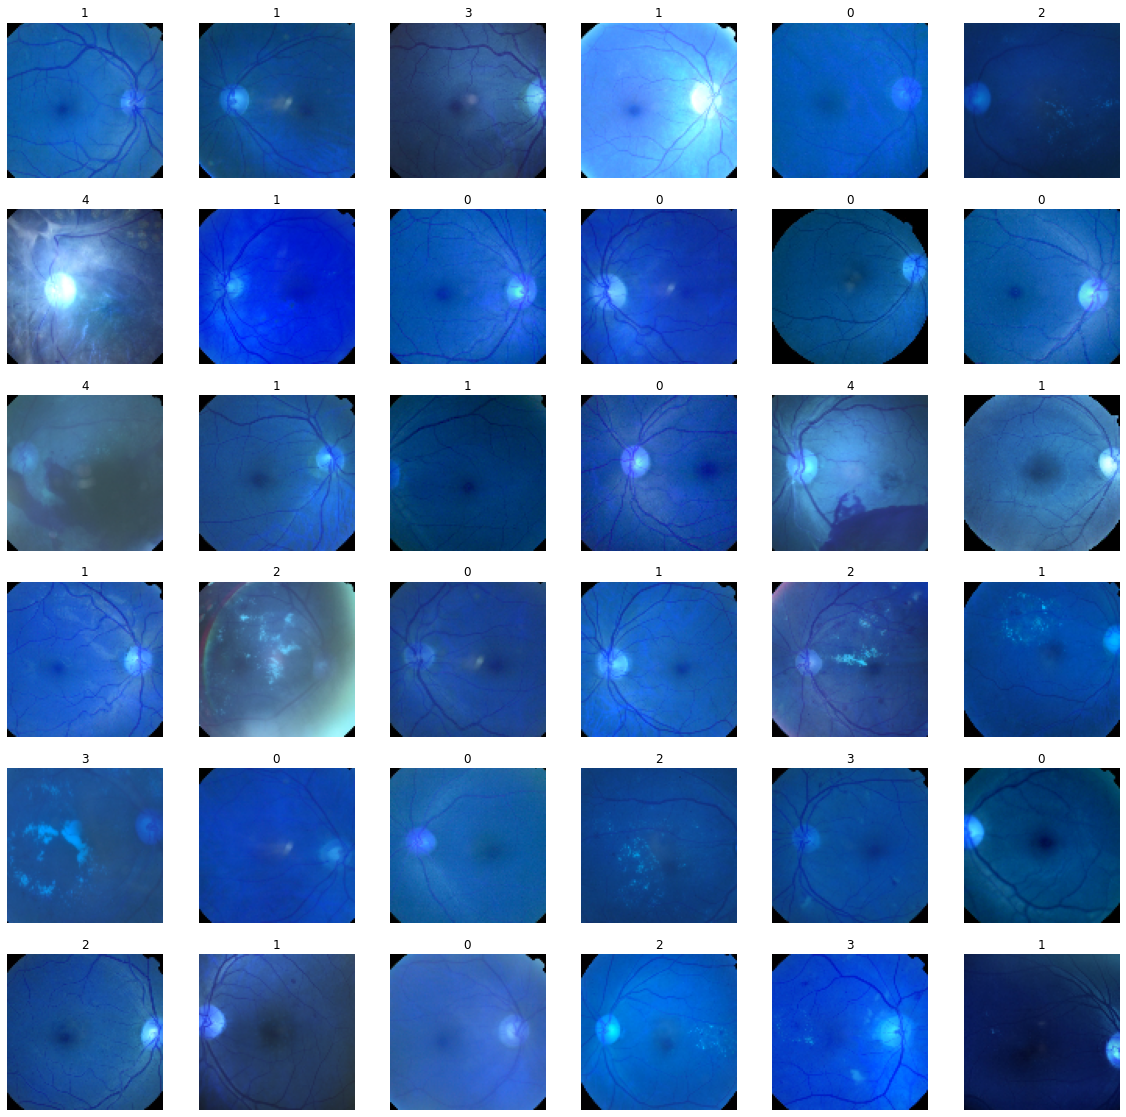

In [27]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Images[i])   
    plt.axis('off')
    plt.title(getcode(y_Types[i]))

In [28]:
# Define VGG16 Model
model = Sequential()
model.add(InceptionResNetV2(include_top=False,weights='imagenet',input_shape=(100,100,3)))

model.add(Flatten())

model.add(Dense(units=1024, activation='relu'))

model.add(Dense(units=512, activation='relu'))

model.add(Dense(units=5, activation='softmax'))

219055592/219055592 [==============================] - 3s 0us/step


In [29]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 56,437,989
Trainable params: 56,377,445
Non-trainable params: 60,544
_______________________________________

In [ ]:
model.fit(np.array(X_Images), np.array(y_Types), epochs=10,batch_size=256,verbose=1)

Epoch 1/10
50/50 [==============================] - 33s 656ms/step - loss: 0.0971 - accuracy: 0.9684
Epoch 2/10
50/50 [==============================] - 33s 656ms/step - loss: 0.0262 - accuracy: 0.9921
Epoch 3/10
50/50 [==============================] - 32s 647ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 4/10
50/50 [==============================] - 33s 653ms/step - loss: 0.0160 - accuracy: 0.9950
Epoch 5/10
50/50 [==============================] - 33s 651ms/step - loss: 0.0256 - accuracy: 0.9899
Epoch 6/10
50/50 [==============================] - 32s 650ms/step - loss: 0.0247 - accuracy: 0.9921
Epoch 7/10
50/50 [==============================] - 33s 651ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 8/10
50/50 [==============================] - 33s 652ms/step - loss: 0.0098 - accuracy: 0.9960
Epoch 9/10
50/50 [==============================] - 33s 652ms/step - loss: 0.0052 - accuracy: 0.9975
Epoch 10/10
50/50 [==============================] - 33s 652ms/step - loss: 0.0045 - accura

In [ ]:
Loss, Accuracy = model.evaluate(np.array(X_Images), np.array(y_Types),batch_size=256)

50/50 [==============================] - 10s 195ms/step - loss: 0.0042 - accuracy: 0.9980


In [ ]:
print('Test Loss is {} %'.format(Loss*100))
print('Test Accuracy is {} %'.format(Accuracy*100 ))

Test Loss is 0.42384848929941654 %
Test Accuracy is 99.803227186203 %


In [10]:
test = '/content/CustomDRDataset/test'

In [11]:
for folder in os.listdir(test):
  files = gb.glob(pathname = str(test + '/' + folder + '/*.png'))
  print(f'For data, found {len(files)} in folder {folder}')

For data, found 100 in folder 3
For data, found 200 in folder 0
For data, found 200 in folder 2
For data, found 200 in folder 1
For data, found 200 in folder 4


In [12]:
size = []
for folder in  os.listdir(test) : 
    files = gb.glob(pathname= str( test + '/' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0      (512, 512, 3)
1      (512, 512, 3)
2      (512, 512, 3)
3      (512, 512, 3)
4      (512, 512, 3)
           ...      
895    (512, 512, 3)
896    (512, 512, 3)
897    (512, 512, 3)
898    (512, 512, 3)
899    (512, 512, 3)
Length: 900, dtype: object>

In [77]:
code = {'No DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferative DR':4}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [14]:
s = 100
x_test = []
y_test = []
for folder in  os.listdir(test) : 
    files = gb.glob(pathname= str( test + '/' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_test.append(list(image_array))
        y_test.append(code[folder])

In [15]:
print(f'we have {len(x_test)} items in x_test')
print(f'we have {len(y_test)} items in y_test')

we have 900 items in x_test
we have 900 items in y_test


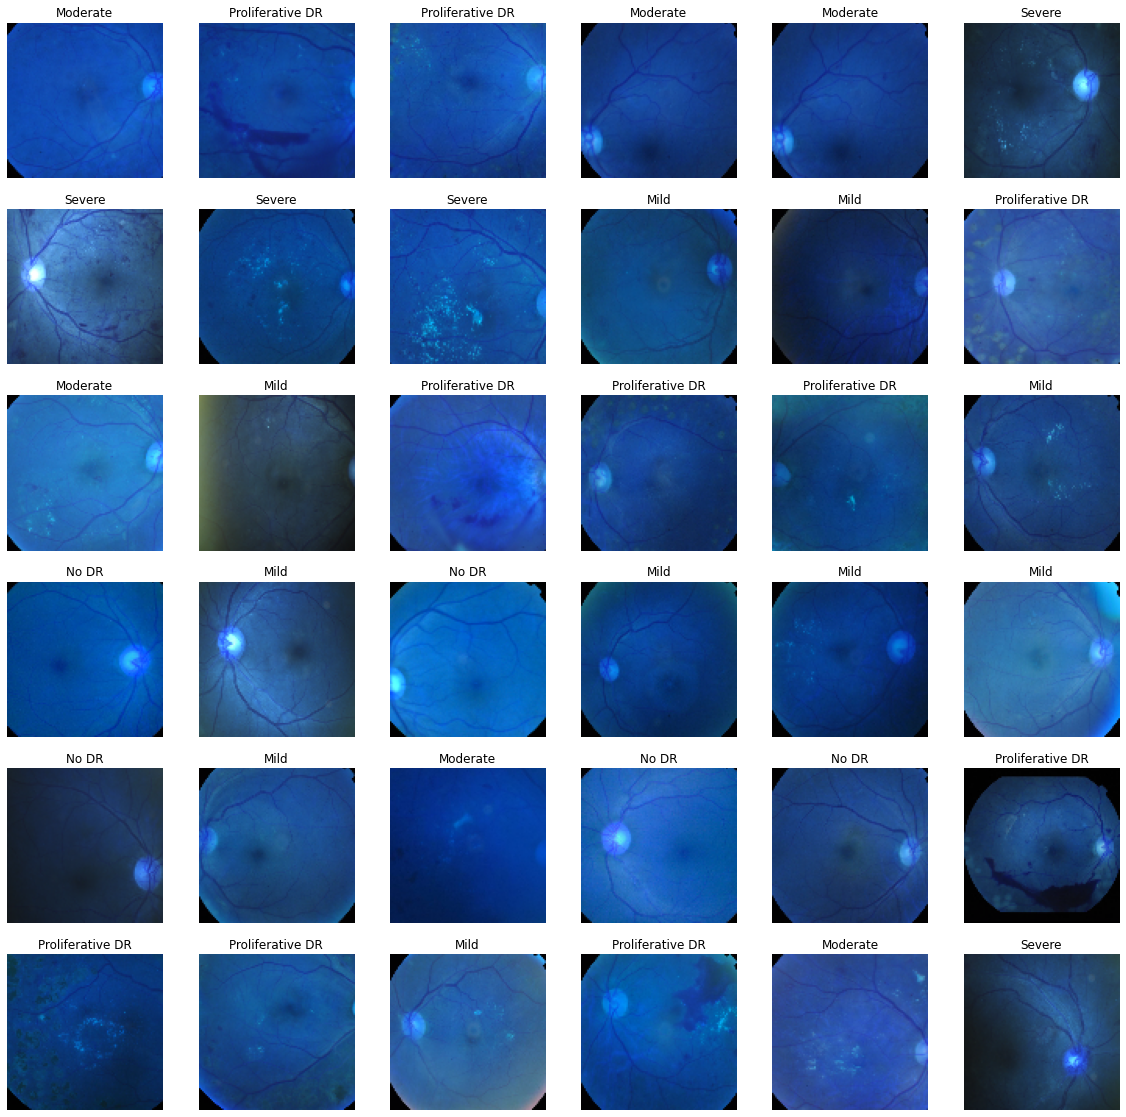

In [78]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])   
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
model.save('/content/diabetic_retinopathy.h5')

In [35]:
model = load_model('/content/diabetic_retinopathy.h5')

9/9 [==============================] - 1s 91ms/step


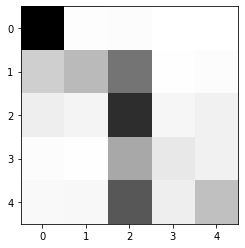

In [37]:
from sklearn.metrics import plot_confusion_matrix
pred = np.argmax(model.predict(np.array(x_test),100),axis=1)
pred
cm = confusion_matrix(y_test,pred)
cm
plt.imshow(cm, cmap='binary')

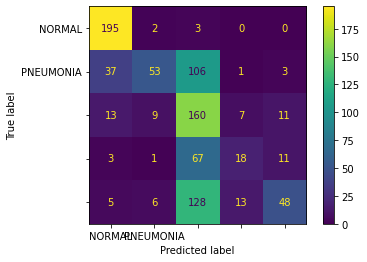

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NORMAL','PNEUMONIA'])

disp = disp.plot()

plt.show()

In [36]:
from tensorflow.keras.utils import to_categorical

print("Performance Report:")
y_pred6=np.argmax(model.predict(np.array(x_test)),axis=-1)
Y_test=to_categorical(y_test,5)
y_pred_prb6=model.predict(np.array(x_test))

from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(y_test, y_pred6)*100)
print('Precision score is :', metrics.precision_score(y_test, y_pred6, average='weighted')*100)
print('Recall score is :',metrics.recall_score(y_test,y_pred6, average='weighted')*100)
print('F1 Score is :', metrics.f1_score(y_test, y_pred6,average='weighted')*100)
print('Cohen Kappa Score:', metrics.cohen_kappa_score(y_test, y_pred6)*100)

Performance Report:
29/29 [==============================] - 1s 42ms/step
Accuracy score is : 52.666666666666664
Precision score is : 61.119131665182195
Recall score is : 52.666666666666664
F1 Score is : 49.22541175836484
Cohen Kappa Score: 39.517274017983915


9/9 [==============================] - 1s 93ms/step


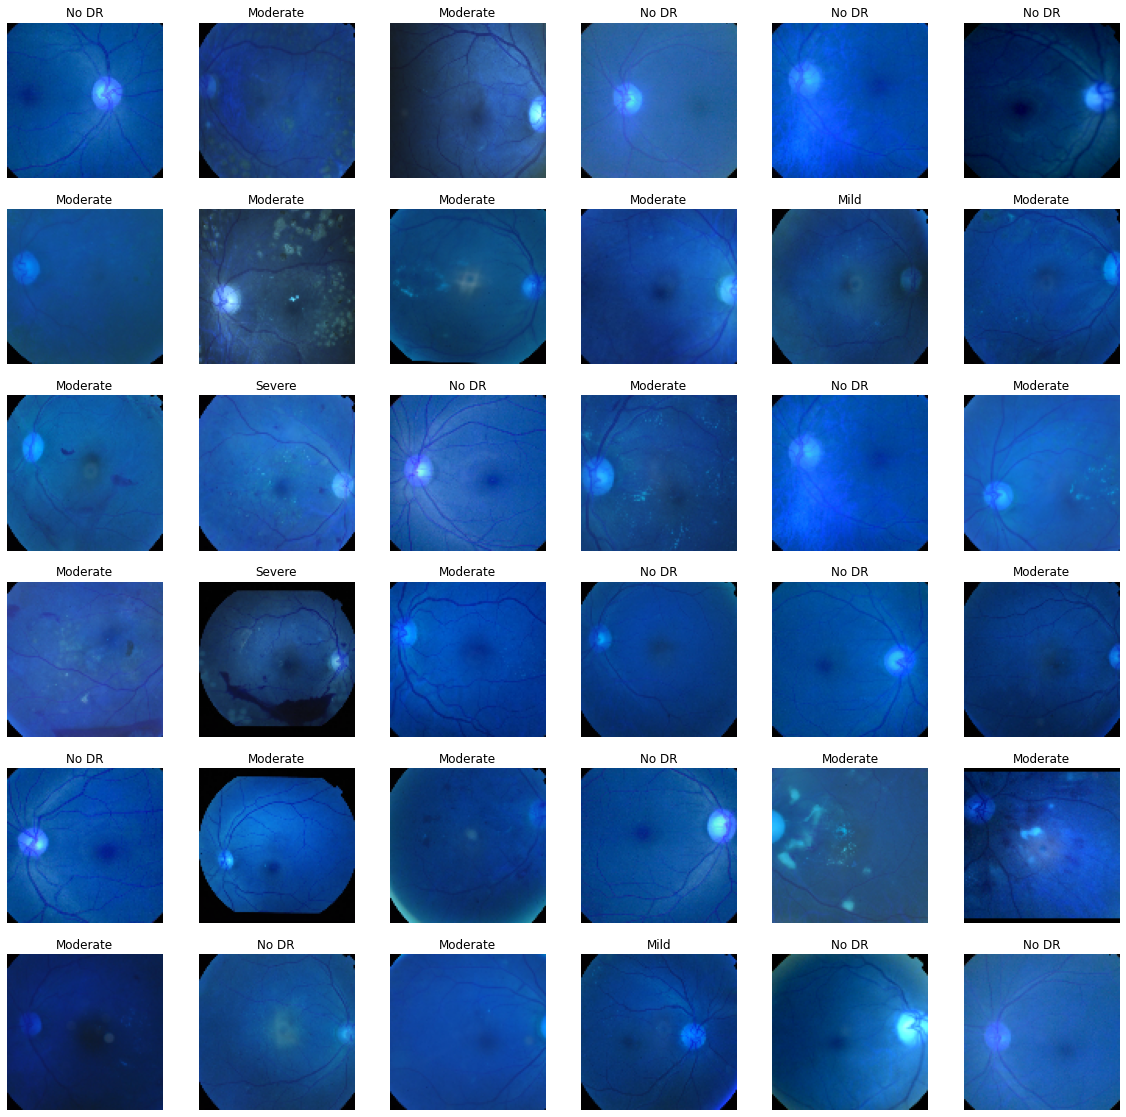

In [79]:
y_pred = np.argmax(model.predict(np.array(x_test),100),axis=1)
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(getcode(y_pred[i]))